In [1]:
# A machine learning model that predicts the prices of houses in a residential area of Boston

In [27]:
#importing modules and dataset
import pandas as pd
import numpy as np
data_ori=pd.read_csv(r'C:\Users\Asus\Desktop\Imp\ml models\pricing on houses\train.csv')
print(data_ori.head())
print(data_ori.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [28]:
print(data_ori.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
#selecting the required features for the model
features=["LotFrontage","Neighborhood","OverallQual","YearBuilt","FullBath","BedroomAbvGr","KitchenAbvGr","GarageCars","SalePrice"]
data1=data_ori[features]
print(data1)

      LotFrontage Neighborhood  OverallQual  YearBuilt  FullBath  \
0            65.0      CollgCr            7       2003         2   
1            80.0      Veenker            6       1976         2   
2            68.0      CollgCr            7       2001         2   
3            60.0      Crawfor            7       1915         1   
4            84.0      NoRidge            8       2000         2   
5            85.0      Mitchel            5       1993         1   
6            75.0      Somerst            8       2004         2   
7             NaN       NWAmes            7       1973         2   
8            51.0      OldTown            7       1931         2   
9            50.0      BrkSide            5       1939         1   
10           70.0       Sawyer            5       1965         1   
11           85.0      NridgHt            9       2005         3   
12            NaN       Sawyer            5       1962         1   
13           91.0      CollgCr            7     

In [30]:
#checking for null values
print(data1.isnull().sum())

LotFrontage     259
Neighborhood      0
OverallQual       0
YearBuilt         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
GarageCars        0
SalePrice         0
dtype: int64


In [31]:
#removing the null values
data2=data1.dropna()
print(data2.isnull().sum())

LotFrontage     0
Neighborhood    0
OverallQual     0
YearBuilt       0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
GarageCars      0
SalePrice       0
dtype: int64


In [32]:
#annalyzing the different values for "neighborhood" column 
location_stats=data2.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)
location_stats

Neighborhood
NAmes      186
CollgCr    126
OldTown    109
Edwards     92
Somerst     78
NridgHt     76
BrkSide     51
SawyerW     50
Gilbert     49
Sawyer      48
NWAmes      45
Crawfor     41
Mitchel     36
IDOTRR      34
NoRidge     33
Timber      30
SWISU       23
StoneBr     20
BrDale      16
MeadowV     15
Blmngtn     14
ClearCr     13
NPkVill      7
Veenker      7
Blueste      2
Name: Neighborhood, dtype: int64

In [33]:
#one hot encoding for converting string values to numeric values
dummies=pd.get_dummies(data2.Neighborhood)
print(dummies.head(5))

   Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
0        0        0       0        0        0        1        0        0   
1        0        0       0        0        0        0        0        0   
2        0        0       0        0        0        1        0        0   
3        0        0       0        0        0        0        1        0   
4        0        0       0        0        0        0        0        0   

   Gilbert  IDOTRR   ...     NoRidge  NridgHt  OldTown  SWISU  Sawyer  \
0        0       0   ...           0        0        0      0       0   
1        0       0   ...           0        0        0      0       0   
2        0       0   ...           0        0        0      0       0   
3        0       0   ...           0        0        0      0       0   
4        0       0   ...           1        0        0      0       0   

   SawyerW  Somerst  StoneBr  Timber  Veenker  
0        0        0        0       0        0  
1       

In [34]:
#appending the dummies column into the dataset
data3=pd.concat([data2,dummies.drop('Blueste',axis='columns')],axis='columns')
data3=data2.drop('Neighborhood',axis='columns')
print(data3.head(5))

   LotFrontage  OverallQual  YearBuilt  FullBath  BedroomAbvGr  KitchenAbvGr  \
0         65.0            7       2003         2             3             1   
1         80.0            6       1976         2             3             1   
2         68.0            7       2001         2             3             1   
3         60.0            7       1915         1             3             1   
4         84.0            8       2000         2             4             1   

   GarageCars  SalePrice  
0           2     208500  
1           2     181500  
2           2     223500  
3           3     140000  
4           3     250000  


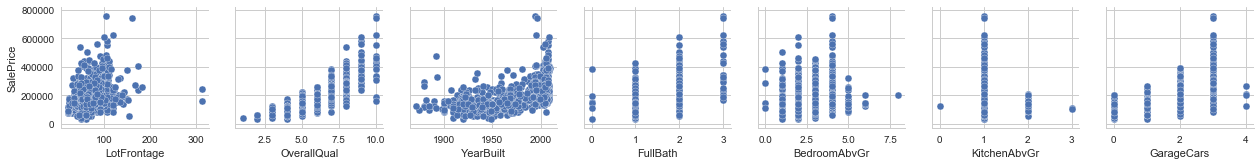

In [35]:
#annalyzing the dataset visually
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style("whitegrid")
sns.set_style("whitegrid")
sns.pairplot(data3,size=2.5,x_vars=["LotFrontage","OverallQual","YearBuilt","FullBath","BedroomAbvGr","KitchenAbvGr","GarageCars"],y_vars=["SalePrice"])
plt.show()

In [36]:
# From the above plotted graphs, it is observed that OverallQual, YearBuilt, FullBath and GarageCars has a linearly increasing relationship with SalePrice.
# KitchenAbvGr shares a linearly decreasing relationship with SalePrice.
# LotFrontage and BedroomAbvGr doesn't have a clear relationship with SalePrice. 

In [37]:
#fitting the data
X=data3.drop('SalePrice',axis='columns')
print(X.head())
y=data3.SalePrice
print(y.head())

   LotFrontage  OverallQual  YearBuilt  FullBath  BedroomAbvGr  KitchenAbvGr  \
0         65.0            7       2003         2             3             1   
1         80.0            6       1976         2             3             1   
2         68.0            7       2001         2             3             1   
3         60.0            7       1915         1             3             1   
4         84.0            8       2000         2             4             1   

   GarageCars  
0           2  
1           2  
2           2  
3           3  
4           3  
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [38]:
# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
model=DecisionTreeRegressor(random_state=1)
model.fit(X,y)
predict=model.predict(X)
print("Prediction is:",predict)
print("Error is:",np.sqrt(mean_squared_error(np.log(y),np.log(predict))))

Prediction is: [206133.33333333 184250.         223500.         ... 266500.
 142125.         147500.        ]
Error is: 0.0333834066750658


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
pred_val=lr_clf.predict(X_test)
print("Prediction is:",pred_val)
print("Accuracy is:",lr_clf.score(X_test,y_test))

Prediction is: [282240.14763396 175468.32701936 175035.176365   285217.2997603
 152888.93939876 210292.70757651  25779.16890612 108746.92110312
 180349.39063194  64919.07520103 282623.81703879 153851.84201874
 117869.8428155  131232.05445517 159468.37932214 177458.34891317
 163707.87079293 119528.11609415 138473.30043139 176459.51505835
 171483.18641131 226890.69117979 116570.31340591 248810.43783304
  97862.20021148 224848.25004196 194524.30660694 264542.93128022
 226556.13410834 225813.05541664  85859.81384489 136368.85159304
 -10735.39086347 156003.9036672  108623.84422092 151708.07423667
  95150.4779673  354694.72453241 321693.08733335 171455.00564743
 144223.13608322 154749.31464928 359357.54661288 191812.58436276
 147973.79521435  94088.01970052 172610.67324598 209800.54668839
 141589.8251934  150975.13413832 105017.01556602 199538.56405725
 225550.41688829 323134.94501808 298970.97648162 280010.91155885
 177481.26718353 118883.85416669 141023.44846067 254705.95503329
 212591.809

In [41]:
# Gaussian Nave Bayes model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()   
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("Prediction is:",y_pred)
print("Accuracy is:",gnb.score(X_test,y_test))

Prediction is: [255000 200000 167900 255000  90000 192500  84500  85000 142500  80000
 350000 169000 126000  91000 129000 208900 105900 138500  84500 208900
 193500 176485 138000 278000 109900 270000 187000 275000 213000 213000
 107000 156000  84500  88000 109500 149900 109900 350000 350000 175000
  83000 158500 179000 231500  83000 116000 177000 192500 132500  83000
  85000 193500 175000 235000 230000 255000  88000 124900  83000 275000
 335000 169000 138500 214000 138000 231500 110000 231500 278000 124900
 187000 193000 162900 124900 123000 226000 175000 175000 129000 350000
 224900  95000 196500 107000 224900 149500 175000 156000 163990  90000
 315000 196500 201000 169000  90000  81000 149900 159500 126000  88000
 260000 138000 149900 160200 142500 158000 124900 162900 275000 224900
 156000 350000 112500 278000 350000 201000  83000 107500 126000  85000
  91000 193500 138000 255000 221000 214000 109500 255000 149900  90000
 142500 224900 189000  90000 278000 350000 134000 118858 19350

In [42]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
r_clf=RandomForestClassifier(n_estimators=100)
r_clf.fit(X_train,y_train)
z=r_clf.predict(X_test)
print("Prediction is:",z)
print("Accuracy is:",metrics.accuracy_score(y_test,z))

Prediction is: [252000 124000 166000 281000 144000 175500  52000  88000 107000  80000
 290000 137450 139000 118000 165500 176000 105900 129500  84500 176000
 259500 176485 127000 178000 109900 245500 175500 301500 226000 213000
 125500 138000  39300 145250 110000 145000 103000 426000 446261 155000
  83000 140000 184750 231500  91000 103000 177000 207500 155000 140000
 147000 185000 172785 235000 367294 287090 189950 141000 120500 254000
 161000 143000 138500 203000 119000 200500 141000 231500 230000 133000
 181500 169990 155000 140000 129900 230000 178000 125000 115000 360000
 155000 112500 182000 149900 165400 230000 189000 116050 169990 145000
 336000 152000 205000 177000 185000  87000 129900 127000 154900 145250
 225000 126000 132000 192500 168500 128000 140000 185000 250000 176500
 130000 305000 144000 155000 314813 248328 124000 136500 109000 124000
 102776 131500  95000 284000 230000 214000 116500 274900 122900 118858
 149500 188000 230000 154300 278000 315000 134000 118858 18500

In [43]:
# Decision Tree Regressor and Linear Regression has higher accuracies than Naive-Bayes and Random Forest Classifier.
# This shows that the former algorithms are better suited for REGRESSION and the latter for CLASSIFICATION.